## Matrix Approximation

This example loads and show a random MNIST image. Then, ranks 1 to 5 approximation is displayed. 

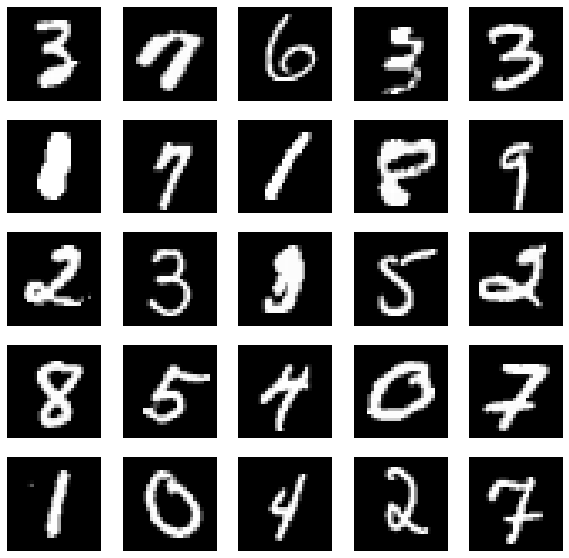

In [71]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import math

# load dataset
(x_train, _), (_, _) = mnist.load_data()

# sample 25 mnist digits from train dataset
n_images = 25
indexes = np.random.randint(0, x_train.shape[0], size=n_images)
images = x_train[indexes]


#plot the 25 mnist digits
def plot_images(images, n_images=25):
    plt.figure(figsize=(10,10))
    side = int(math.sqrt(n_images))
    for i in range(len(indexes)):
        plt.subplot(side, side, i + 1)
        image = images[i]
        plt.imshow(image, cmap='gray')
        plt.axis('off')

    plt.show()
    plt.close('all')
    
plot_images(images, n_images=n_images)

In [ ]:
recons = np.empty_like(images)
for i in range(n_images):
    U,S,V = np.linalg.svd(images[i])
    D = np.diag(S)
    recon = np.dot(U, np.dot(D,V))
    recons[i] = np.clip(recon, 0, 255)

print("Full SVD Reconstruction")
plot_images(recons, n_images=n_images)

In [98]:
rank = int(input("Enter rank: "))

Enter rank: 5


In [99]:
assert(rank > 0)
print("%d-Rank Matrix Approximation:" % rank)

5-Rank Matrix Approximation:


5-Rank Image Reconstruction:


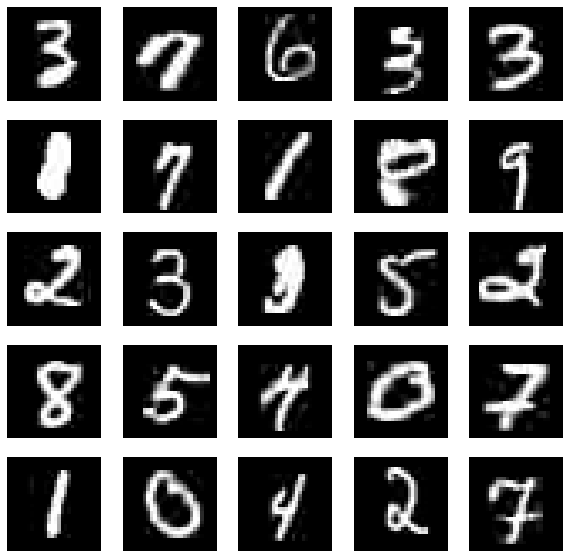

In [100]:
recons = np.empty_like(images)
for i in range(n_images):
    U,S,V = np.linalg.svd(images[i])
    S[rank:] = 0
    D = np.diag(S)
    recon = np.dot(U, np.dot(D,V))
    recons[i] = np.clip(recon, 0, 255)
    
print("%d-Rank Image Reconstruction:" % rank)
plot_images(recons, n_images=n_images)

5-Rank Image Reconstruction:


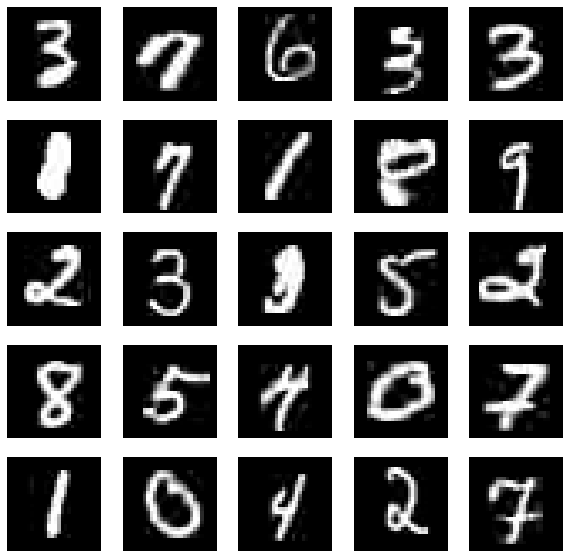

In [102]:
recons = np.empty_like(images)
for i in range(n_images):
    U,S,V = np.linalg.svd(images[i])
    recon = np.zeros_like(images[i], dtype=np.float64)
    for j in range(rank):
        u = np.reshape(U[:,j], (-1,1))
        v = np.reshape(V[j,:], (-1,1))
        s = S[j]
        part_recon = s*np.dot(u,v.T)
        recon += part_recon
    #recon = np.clip(recon, 0, 255)
    recons[i] = np.clip(recon, 0, 255)
    
print("%d-Rank Image Reconstruction using A(k)=sum(A_i):" % rank)
plot_images(recons, n_images=n_images)